#0) Introduction

The goal of this mini-project is to practice machine learning through predictions for a multi-class problem and using different methods. This is my first take on more optimal techniques used to do predictions.

The goal of the project is to do Multi-Class Predictions of Obesity Risk using various medical factors. The original competition can be found on [Kaggle](https://www.kaggle.com/competitions/playground-series-s4e2).



# 1) Data exploration / Visualization

## a) Loading data

The first thing to do is to import thrid-parties libraries in order to do our predictions:
- **pandas:** Ability to use DataFrame as data structures to store our CSV data
- **numpy:** The fundamental math library in python: perform math operations on matrices and use optimized data structures (array / matrices...)
- **sklearn:** The fundamental library that implements a LOT of widely-used machine learning models. Does all the complicated math things for us :)

We also use three less famous libraries xgboost/lightgbm/catboost that implements gradient-boosting models optimized for multi-class classification problems.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


%pip install catboost #For google collab
from catboost import CatBoostClassifier

Once this is done, let's have a look to our data to know which pre-processing will be needed.

In [ ]:
train_df = pd.read_csv('train.csv') #Open the training dataset
test_df = pd.read_csv('test.csv') #Open the test dataset

## b) Quick Data Exploration

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


What does that mean ?

- First we had a look to the type of data we have.<br>
- Secondly, we visualized real data to get an idea of what needs to be encoded.

Using the "info" method, we can see that there are 18 containing all 20758 rows.
8 columns contain **quantitative data** --> These columns stores numbers. One column is an integer (int64) which corresponds to the id of the row. This columns needs to be dropped in the future when fitting the model as we are sure that the ID must not be included as a pramaeter for the prediction.

Finally, there are 9 "categorical data". Some data is just yes/no and can be thus converted into a boolean form (0 or 1). The other columns have to be encoded using a label encoding method (explained later).

One important thing to check now is **missing data**! Most models cannot work with missing data and will just ignore rows where there is missing data. Careful ! There shouldn't be any missingdata in **both** training and test datasets !

In [ ]:
print("There are ", sum(train_df.isna().sum()), "missing values in train")
print("There are ", sum(test_df.isna().sum()), "missing values in test")

There are  0 missing values in train
There are  0 missing values in test


Good news ! No imputation is required in this case.

Finally, we can check is there are duplicates in our data to remove them

In [ ]:
print("There are ", train_df.duplicated().sum(), "duplicated values in train")
print("There are ", test_df.duplicated().sum(), "duplicated values in test")

There are  0 duplicated values in train
There are  0 duplicated values in test


Great ! Same conclusion as above.

## c) Data visualization

In this part, we draw (awesome) graphs using matplotlib.

First, we need to extract the numerical features and the categorical features as they are not drawn the same way.

In [ ]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.to_list() #extract numerical columns
cat_cols = train_df.select_dtypes(include=['object']).columns.to_list() #extract categorical columns

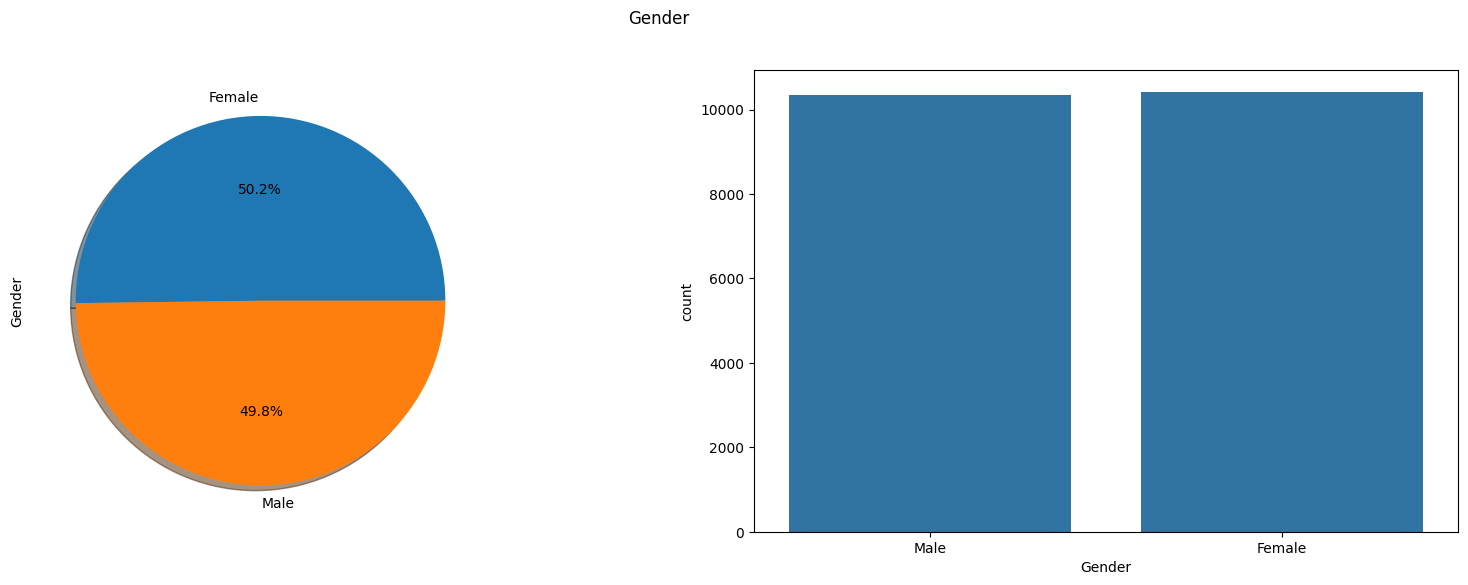

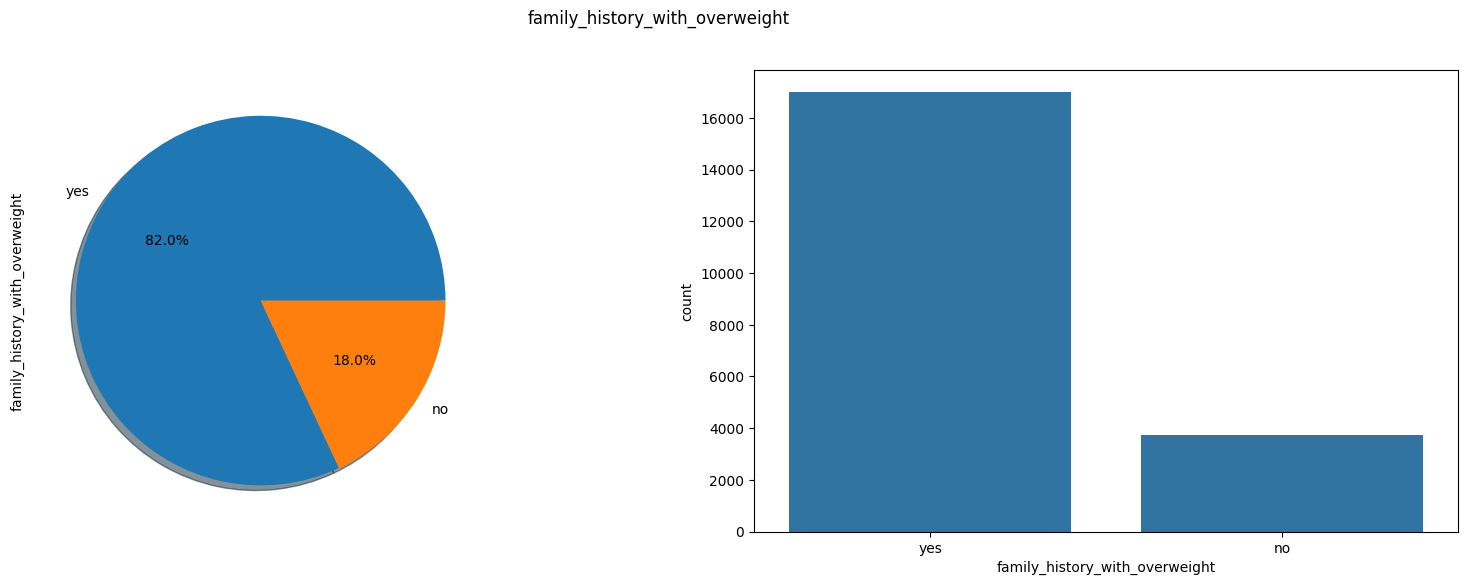

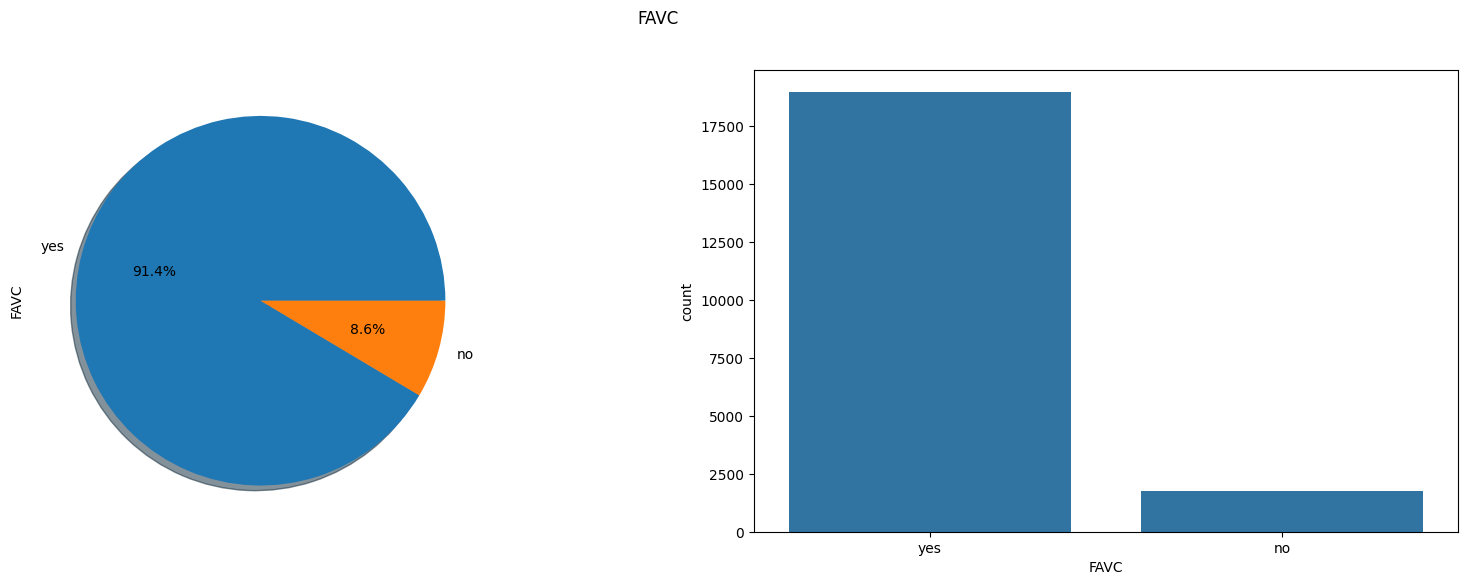

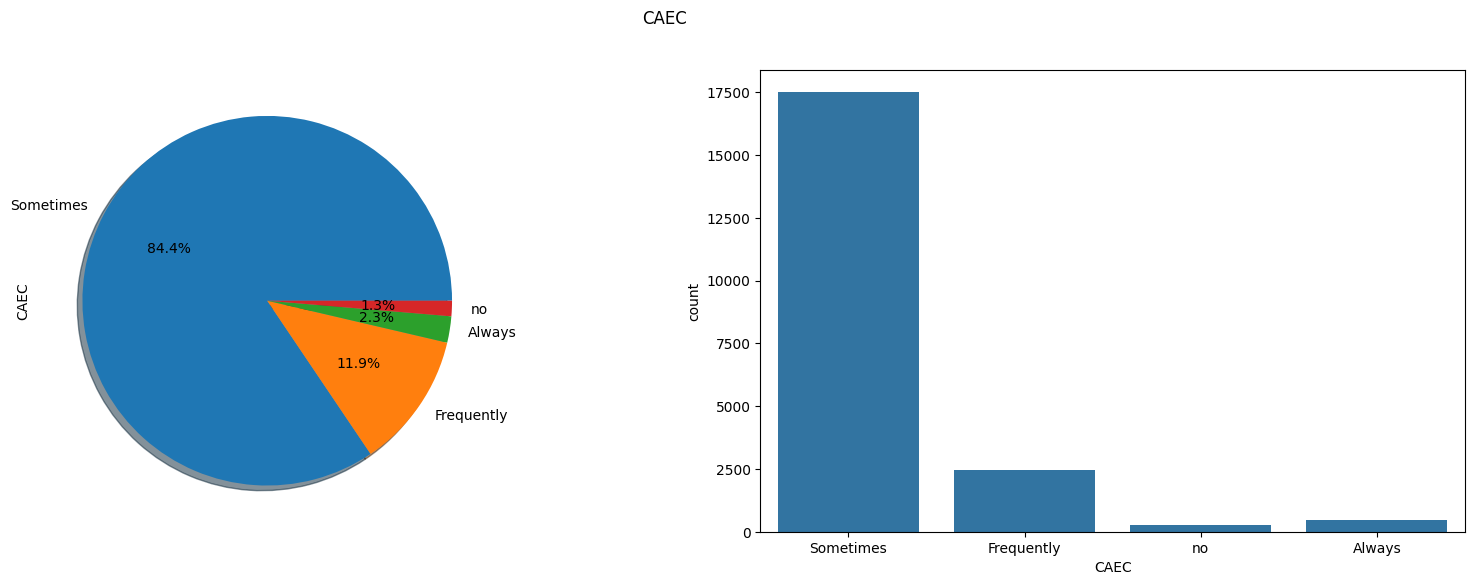

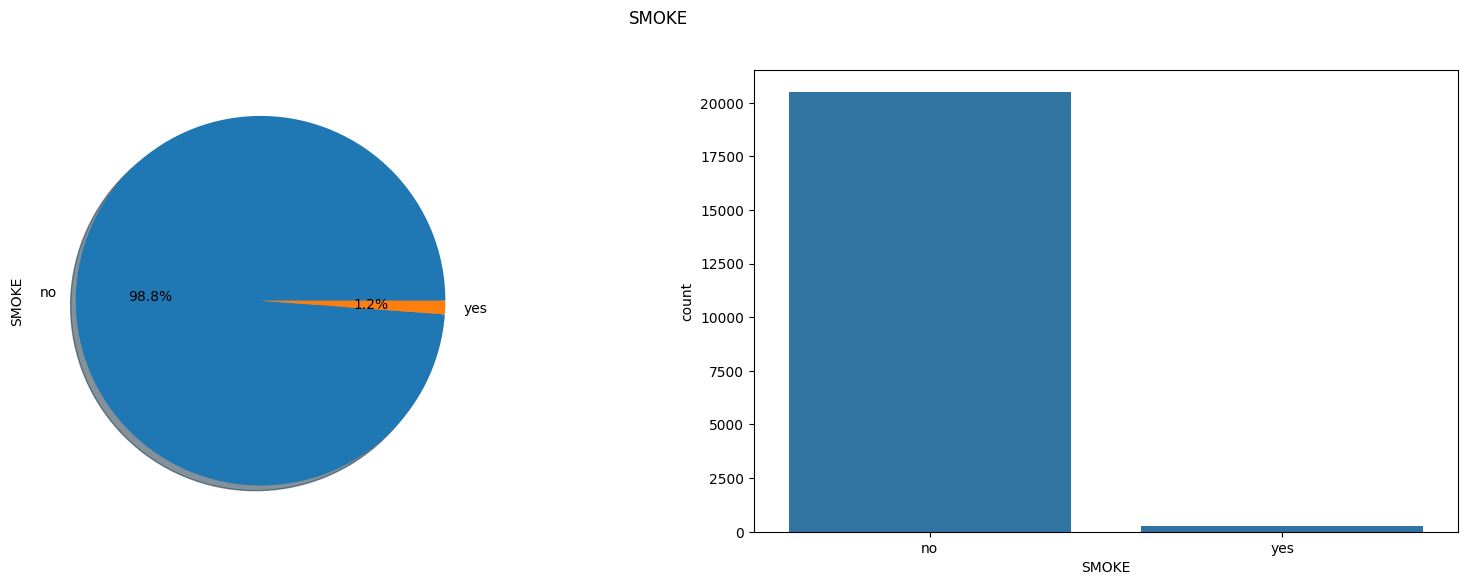

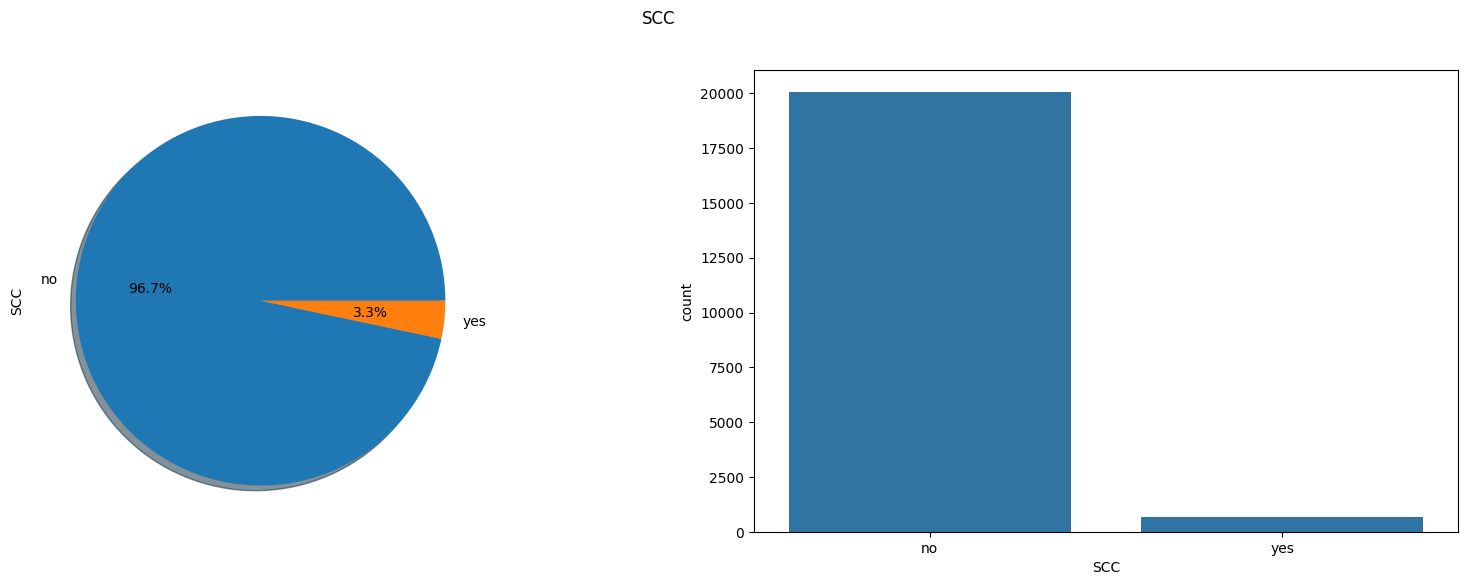

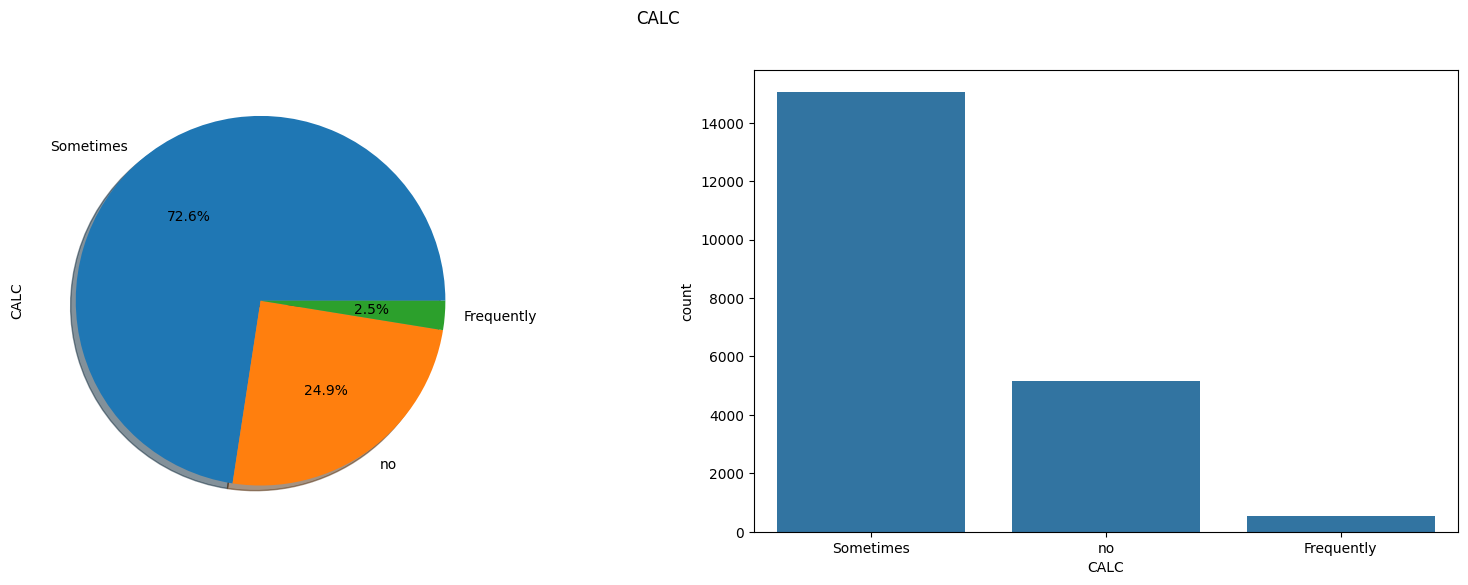

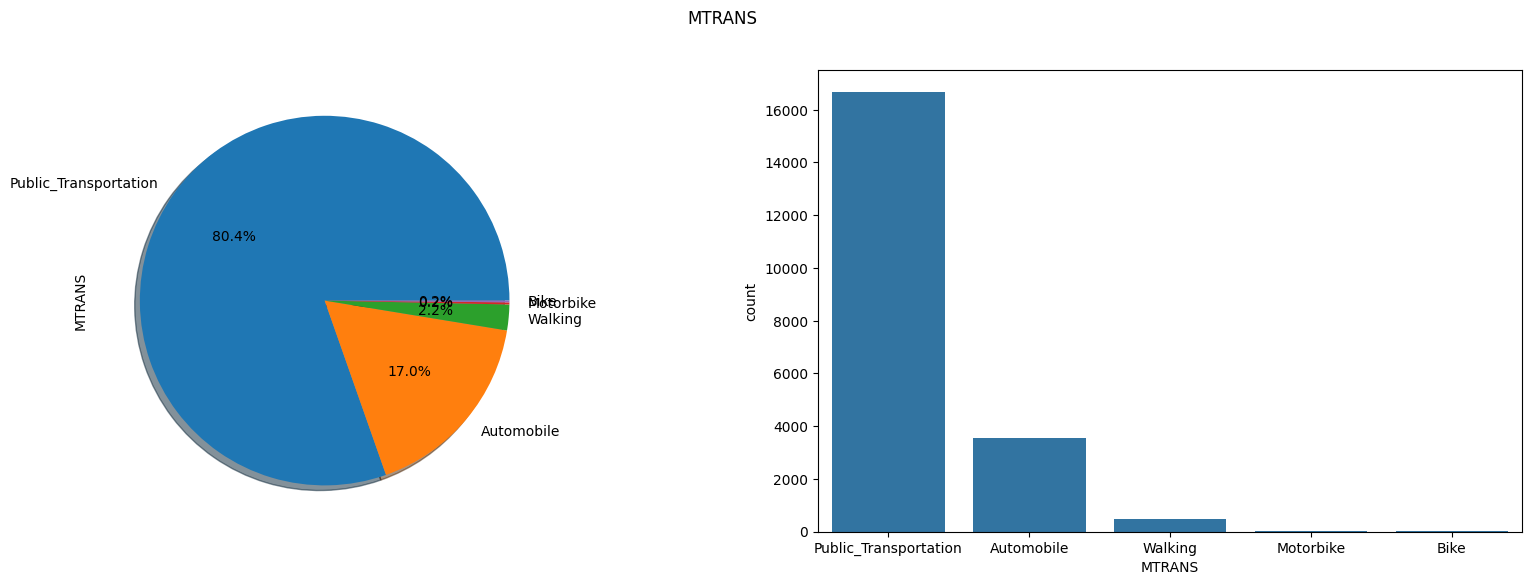

In [ ]:
for column in cat_cols[:-1]:
    f,ax = plt.subplots(1,2,figsize = (20, 6))
    train_df[column].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0],shadow = True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x = column, data = train_df,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

Let's have a look to the target NObeyesdad.

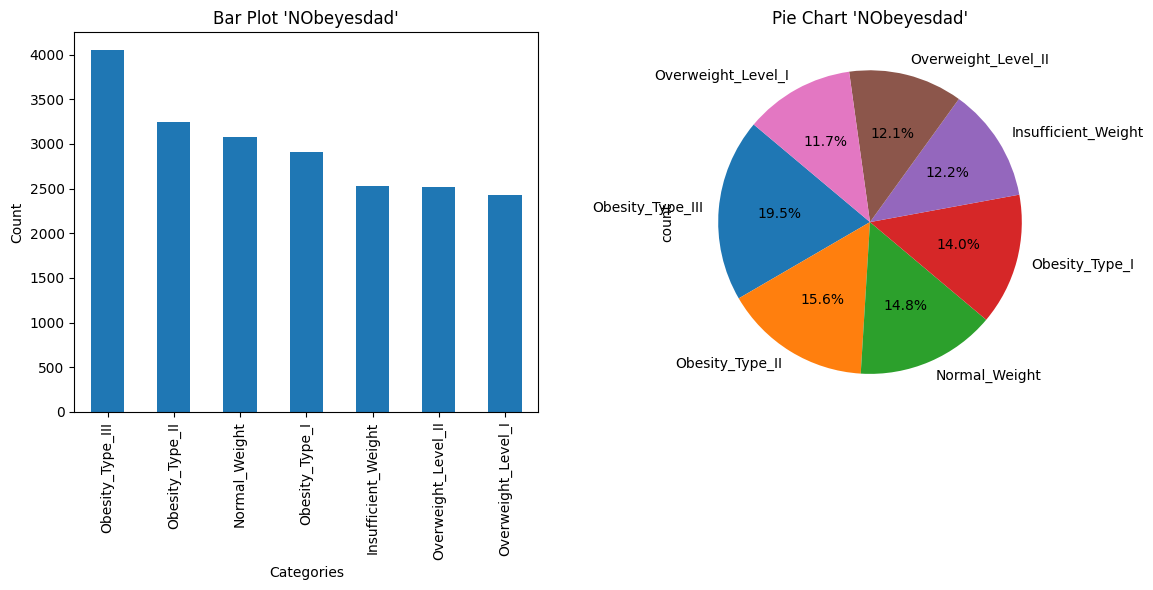

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


train_df["NObeyesdad"].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("Bar Plot 'NObeyesdad'")
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Count")


train_df["NObeyesdad"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1])
axes[1].set_title("Pie Chart 'NObeyesdad'")


plt.tight_layout()


plt.show()

This visualization shows a balanced distribution across all categories within the dataset. Each category appears with a comparable frequency, suggesting that no category holds a significant advantage over others in terms of prediction likelihood. This balanced representation ensures that the model's predictions are not skewed towards any particular category.

# 2) Preprocessing

Thanks to the previous data exploration, we knows that there is very little processing to do.

The first thing to apply here is data encoding on numerical features.
There are mostly two techniques to achieve this:

- **LabelEncoding:** This technique is used when dealing with categorical variables with ordinal relationships, meaning there's a natural ordering among the categories. For example, categories like "low", "medium", and "high" have an inherent order. LabelEncoder assigns a unique integer to each category, preserving the ordinal relationship.

- **OneHotEncoding:** This technique is used when dealing with categorical variables without any ordinal relationship, meaning there's no inherent order among the categories. It creates binary columns for each category, where each column represents one category and indicates its presence (1) or absence (0). This prevents the model from misinterpreting the categories as having an ordered relationship.

Which method do we use in this example ? LabelEncoding because it is easier to implement.

In [ ]:
label_encoder = LabelEncoder()

train_df["NObeyesdad"] = label_encoder.fit_transform(train_df["NObeyesdad"])

train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

train_df.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,...,True,False,False,True,False,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,...,True,False,False,False,True,True,False,False,False,False
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,...,True,False,False,False,True,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,...,True,False,False,True,False,False,False,False,True,False
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,...,True,False,False,True,False,False,False,False,True,False


We can also apply Scaling to the features to reduce their variance. We use the StandardScaler which transforme numerical features to have a mean of 0 and a variance of 1.

We first have to split the training dataset into many variables
- **X_train:** contains the features used to train the model
- **X_val:** the features used to evaluate the model accuracy
- **X_train:** contains the target contained in the training dataset
- **X_val:** the target corresponding to the evaluation of the model.

In [ ]:
#Split Data

X = train_df.drop(["id", "NObeyesdad"], axis=1)
y = train_df["NObeyesdad"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Apply a standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 3) Modelling

In this part, we are going to apply a model to fit our data in order to do some predictions on test data.

To do that, we can fit multiple models on our data and then evaluate the models by using the **accuracy** metric which correponds to the division of the number of correct predictions by the total number of predictions (higher is better).

We are going to test 4 main families of models:
- Decision Trees (Random Forest)
- Support Vector Machine (SVC)
- Gradient Boosting Machines (GBM)
- Artificial Neural Networks (ANN)

First we fit all models with our training data.

In [ ]:
# Decision Tree
model_rf = RandomForestClassifier(random_state=42)

#Support Vector Machine
model_svc = SVC(random_state=42)

#Gradiant Boosting Machines
model_gb = GradientBoostingClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_lgbm = LGBMClassifier(random_state=42, verbose=0)
model_cat = CatBoostClassifier(random_state=42, verbose=0)

#Artificial Neural Network
model_mlp = MLPClassifier(random_state=42)

models = [model_gb, model_xgb, model_lgbm, model_cat, model_svc, model_mlp, model_rf]

fit = []

for model in models:
    fitted = model.fit(X_train, y_train)
    fit.append(fitted)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Then, we can predict how well the model performs by using **the data we know**, namely the X_val variable which cointains the features of the **training** dataset.

In [ ]:
accuracies = {}

for model in fit:
    train_preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, train_preds)
    accuracies[model.__class__.__name__] = accuracy

sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

for model_name, accuracy in sorted_accuracies:
    print(f"Validation accuracy for {model_name}: {accuracy}")

Validation accuracy for GradientBoostingClassifier: 0.9039017341040463
Validation accuracy for LGBMClassifier: 0.9039017341040463
Validation accuracy for CatBoostClassifier: 0.9024566473988439
Validation accuracy for XGBClassifier: 0.9019749518304432
Validation accuracy for RandomForestClassifier: 0.8860789980732178
Validation accuracy for MLPClassifier: 0.8682562620423893
Validation accuracy for SVC: 0.8427263969171483


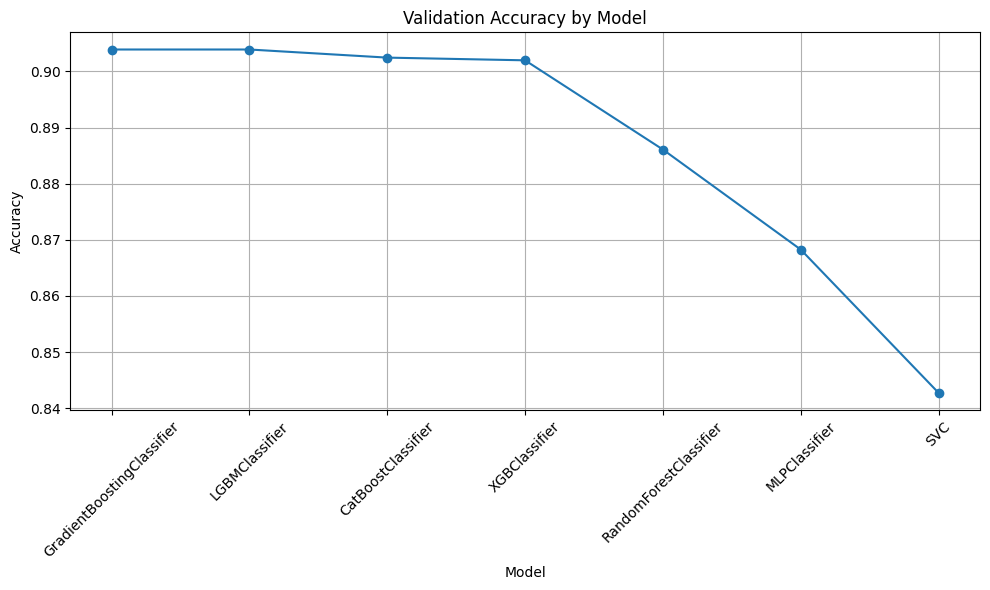

In [ ]:
model_names = [model_name for model_name, _ in sorted_accuracies]
accuracies_values = [accuracy for _, accuracy in sorted_accuracies]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies_values, marker='o', linestyle='-')
plt.title('Validation Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

Great ! Now we know that in this case Gradiant Boosting Machines have a better accuracy.

The performance of the model is highly influenced by **hyperparamaters** which can be adjusted in ordrer to get better accuracy. However, hyperparameter tuning is not easy as we have to "guess" which value for these parameters would be the best.

But there is an easy but time-consuming way of finding these parameters using scikit-learn by performing a **RandomizedSearchCV**.

During the search process, RandomizedSearchCV fits the model with each combination of hyperparameters using cross-validation and evaluates its performance. After evaluating all combinations, it returns the best set of hyperparameters that maximize the performance metric specified

In [ ]:
"""
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np


param_grid = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}


lgbm = LGBMClassifier(verbosity=-1)


random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=100, cv=3, scoring='accuracy', random_state=42)


random_search.fit(X_train, y_train)


print("Best parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
"""

'\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom lightgbm import LGBMClassifier\nimport numpy as np\n\n\nparam_grid = {\n    \'learning_rate\': np.linspace(0.01, 0.1, 10),\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [3, 5, 7, 10],\n    \'num_leaves\': [10, 20, 30, 40],\n    \'min_child_samples\': [10, 20, 30, 40],\n    \'subsample\': np.linspace(0.6, 1.0, 5),\n    \'colsample_bytree\': np.linspace(0.6, 1.0, 5)\n}\n\n\nlgbm = LGBMClassifier(verbosity=-1)\n\n\nrandom_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=100, cv=3, scoring=\'accuracy\', random_state=42)\n\n\nrandom_search.fit(X_train, y_train)\n\n\nprint("Best parameters:", random_search.best_params_)\nprint("Best Score:", random_search.best_score_)\n'

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.4, 1.0, 7),
    'lambda_l1': [0, 0.001, 0.01, 0.05, 0.1, 1.0],
    'lambda_l2': [0, 0.001, 0.01, 0.05, 0.1, 1.0]
}


lgbm = LGBMClassifier(verbosity=-1)


random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=100, cv=3, scoring='accuracy', random_state=42)


random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
"""

'from sklearn.model_selection import RandomizedSearchCV\n\n# Définir les hyperparamètres à rechercher\nparam_grid = {\n    \'learning_rate\': np.linspace(0.01, 0.1, 10),\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [3, 5, 7, 10],\n    \'num_leaves\': [10, 20, 30, 40],\n    \'min_child_samples\': [10, 20, 30, 40],\n    \'subsample\': np.linspace(0.6, 1.0, 5),\n    \'colsample_bytree\': np.linspace(0.4, 1.0, 7),\n    \'lambda_l1\': [0, 0.001, 0.01, 0.05, 0.1, 1.0],\n    \'lambda_l2\': [0, 0.001, 0.01, 0.05, 0.1, 1.0]\n}\n\n\nlgbm = LGBMClassifier(verbosity=-1)\n\n\nrandom_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_grid, n_iter=100, cv=3, scoring=\'accuracy\', random_state=42)\n\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best parameters:", random_search.best_params_)\nprint("Best Score:", random_search.best_score_)\n'

After 25 minutes of calculations, we find this combination:

**Parameters grid**:

```
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40],
    'min_child_samples': [10, 20, 30, 40],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.4, 1.0, 7),
    'lambda_l1': [0, 0.001, 0.01, 0.05, 0.1, 1.0],
    'lambda_l2': [0, 0.001, 0.01, 0.05, 0.1, 1.0]
```



**Best parameters**:
```
'subsample': 0.9,
'num_leaves': 40,
'n_estimators': 300,
'min_child_samples': 10,
'max_depth': 3,
'learning_rate': 0.07,
'colsample_bytree': 0.7
```

**Best score**:
```
0.9082863604005339
```

Best parameters:
{'subsample': 1.0,
'num_leaves': 30,
'n_estimators': 300,
'min_child_samples': 30,
'max_depth': 10,
'learning_rate': 0.030000000000000006,
'lambda_l2': 1.0,
'lambda_l1': 0,
'colsample_bytree': 0.4
}
Best Score: 0.9101530721472918

We can now instanciate a gradient boosting machine model using the above parameters.

In [ ]:
model_lgbm_optimized = LGBMClassifier(random_state=42, subsample = 1.0, num_leaves = 30, n_estimators = 300, min_child_samples = 30, max_depth = 10, learning_rate = 0.03, colsample_bytree = 0.4)
model_lgbm_optimized = model_lgbm_optimized.fit(X_train, y_train)
"""
model_lgbm_optimized = LGBMClassifier(random_state=42, subsample = 0.9, num_leaves = 40, n_estimators = 300, min_child_samples = 10, max_depth = 3, learning_rate = 0.07, colsample_bytree = 0.7)
model_lgbm_optimized = model_lgbm_optimized.fit(X_train, y_train)"""

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 29
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625


'\nmodel_lgbm_optimized = LGBMClassifier(random_state=42, subsample = 0.9, num_leaves = 40, n_estimators = 300, min_child_samples = 10, max_depth = 3, learning_rate = 0.07, colsample_bytree = 0.7)\nmodel_lgbm_optimized = model_lgbm_optimized.fit(X_train, y_train)'

And evaluate the accuracy like we did previously.

In [ ]:
test_preds_optimized = model_lgbm_optimized.predict(X_val)
accuracy = accuracy_score(y_val, test_preds_optimized)
print(f"Validation accuracy for {model_lgbm_optimized}: {accuracy}")

Validation accuracy for LGBMClassifier(colsample_bytree=0.4, learning_rate=0.03, max_depth=10,
               min_child_samples=30, n_estimators=300, num_leaves=30,
               random_state=42): 0.9065510597302505


In [ ]:
basic_accuracy = 0.9039017341040463
fined_tuned_accuracy = 0.9089595375722543
diff = fined_tuned_accuracy - basic_accuracy
better_classified_cases = np.ceil(diff * test_df.shape[0])

print(f"Using a fine-tuned hypxerpameters gradient boosting classifier made {better_classified_cases} predictions better.")

Using a fine-tuned hypxerpameters gradient boosting classifier made 70.0 predictions better.


To visualize the accuracy of the model, we can use the **confusion matrix**.

The confusion matrix is a square matrix where the rows represent the actual classes and the columns represent the predicted classes. Each cell in the matrix corresponds to the count of observations that fall into a particular combination of actual and predicted classes.

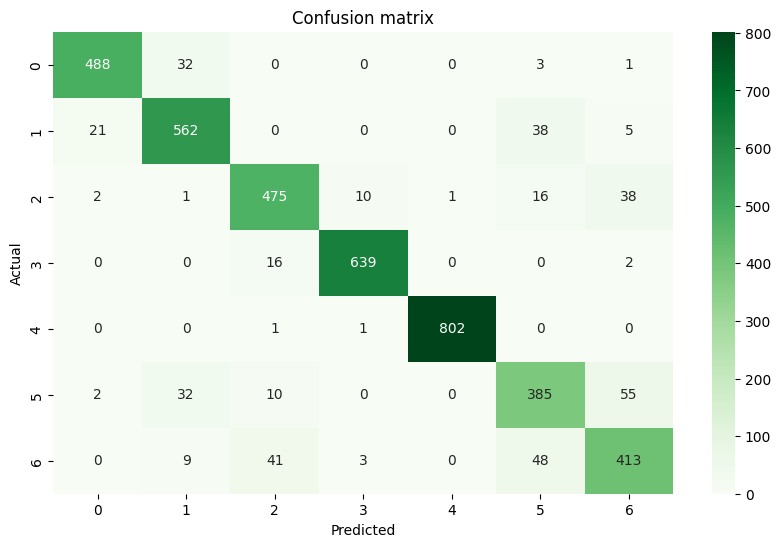

In [ ]:
confmat = pd.crosstab(y_val, test_preds_optimized, rownames=["Actual"], colnames=["Predicted"])
plt.figure(figsize=(10, 6))
sns.heatmap(confmat, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion matrix")
plt.show()

# 4) Doing predictions and generating the submission sample

Now, we are ready to do predictions using the **test data**. It contains the same colums as the training dataset. However, the "NObeyesdad" column is missing... This is the data we are looking for. Using our optimized gradient boosting model, we predict for each given row, a value for NObeyesdad.

In [ ]:
if "CALC_Always" in test_df.columns:
    test_df.drop("CALC_Always", axis=1, inplace=True)

#Be sure that the test data is scaled the same way as the training data
scaled_test_df = scaler.transform(test_df.drop("id", axis=1))

test_preds_optimized = model_lgbm_optimized.predict(scaled_test_df)

Finally we build a dataframe using pandas where the first column contains the id's of the observation and the second one the prediction.

In [ ]:
submission = pd.DataFrame({"id": test_df["id"], "NObeyesdad": label_encoder.inverse_transform(test_preds_optimized)})
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
submission.to_csv("submission.csv", index=False)

# 5) Conclusion

On this notebook, we studied how we can do some predictions using a training dataset and a test dataset:

- 1) Load Data
- 2) Preprocess data --> Do label encoding + scale data
- 3) Choose a model using the accuracy metric
- 4) Fine-Tune the model by performing a RandomGridSearchCV to find better hyperparameters.
- 5) Do predictions on a test dataset.

Doing that, we obtain a score of a public score of **0.91184** on Kaggle, not too bad but this can be improved:

- By performing a better serach for hyperparmaters: here only 7 parameters are fine-tuned but there are others: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html.

- By training a neural-network model on this specific case.

According to some other notebooks, these parameters would be the most optimal. They use another library called [Optuna](https://optuna.org/) to optimize the hyperparameters and find the following values for the hyperparameters.

    "objective": "multiclass",          
    "metric": "multi_logloss",          
    "verbosity": -1,                    
    "boosting_type": "gbdt",            
    "random_state": 42,       
    "num_class": 7,                     
    'learning_rate': 0.030962211546832760,  
    'n_estimators': 500,                
    'lambda_l1': 0.009667446568254372,  
    'lambda_l2': 0.04018641437301800,   
    'max_depth': 10,                    
    'colsample_bytree': 0.40977129346872643,  
    'subsample': 0.9535797422450176,   
    'min_child_samples': 26
